Dataset:- **SALARY PREDICTION **

# This dataset appears to be a tabular dataset containing various features related to individuals, such as age, workclass, education, marital status, occupation, race, sex, capital gains, capital loss, hours per week, native country, and salary.

Here's a brief description of each column:

- age: Age of the individual.
- workclass: The type of employment (e.g., private, self-employed, government).
- fnlwgt: Final weight. This is the number of people the census takers believe the entry represents.
- education: Highest level of education achieved.
- education-num: Numeric representation of education level.
- marital-status: Marital status of the individual.
- occupation: Occupation of the individual.
- relationship: Relationship status of the individual.
- race: Race of the individual.
- sex: Gender of the individual.
- capital-gain: Capital gains for the individual.
- capital-loss: Capital losses for the individual.
- hours-per-week: Hours worked per week.
- native-country: Native country of the individual.
- salary: Salary bracket, indicating whether the individual earns less than or more than $50K per year.

**PACKAGE INITIALIZATION**

In [39]:
!pip install xgboost

In [2]:
!pip install datasist


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.0 MB/s eta 0:00:00


**Necessary imports**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.model_selection import  train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
!pip install requests
!pip install tabulate
!pip install future

In [5]:
!pip uninstall h2o

In [6]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=0484200286ada5bfe476ef68e238918f75084a203e9be6421a3fa414f2b4ee3d
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


**Initiate H2O**

In [7]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmponw0ippb
  JVM stdout: /tmp/tmponw0ippb/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmponw0ippb/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_2atem6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


**Reading the data and displaying few rows**

In [8]:
# Reading the salary dataset from raw GitHub URL
url = 'https://raw.githubusercontent.com/thoratmansi/AutoML-/main/salary.csv'
data = pd.read_csv(url)

# Display the first few rows of the dataset to verify it was read correctly
print(data.head())

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  salary  
0          2174             0              40   United-States   <=50

**Converting the non numeric data into numeric form**

In [9]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_columns = ['workclass','occupation','race','sex','native-country','relationship','education','marital-status']
encoder = OrdinalEncoder(categories='auto')
data[ordinal_columns] = encoder.fit_transform(data[ordinal_columns])

**Utilizes scikit-learn's LabelEncoder to transform the 'salary' column in the DataFrame named 'data' into numerical labels.**

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['salary'] = le.fit_transform(data['salary'])

**Correlation between all features in the data**

In [11]:
data.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
age,1.000000,0.003787,-0.076646,-0.010508,0.036527,-0.266288,-0.020947,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234037
workclass,0.003787,1.000000,-0.016656,0.023513,0.052085,-0.064731,0.254892,-0.090461,0.049742,0.095981,0.033835,0.012216,0.138962,-0.007690,0.051604
fnlwgt,-0.076646,-0.016656,1.000000,-0.028145,-0.043195,0.028153,0.001597,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.051966,-0.009463
education,-0.010508,0.023513,-0.028145,1.000000,0.359153,-0.038407,-0.021260,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.064288,0.079317
education-num,0.036527,0.052085,-0.043195,0.359153,1.000000,-0.069304,0.109697,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.050840,0.335154
marital-status,-0.266288,-0.064731,0.028153,-0.038407,-0.069304,1.000000,-0.009654,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.023819,-0.199307
occupation,-0.020947,0.254892,0.001597,-0.021260,0.109697,-0.009654,1.000000,-0.075607,0.006763,0.080296,0.025505,0.017987,0.080383,-0.012543,0.075468
relationship,-0.263698,-0.090461,0.008931,-0.010876,-0.094153,0.185451,-0.075607,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.005507,-0.250918
race,0.028718,0.049742,-0.021291,0.014131,0.031838,-0.068013,0.006763,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.137852,0.071846
sex,0.088832,0.095981,0.026858,-0.027356,0.012280,-0.129314,0.080296,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,-0.008119,0.215980


**HEATMAP**

<Axes: >

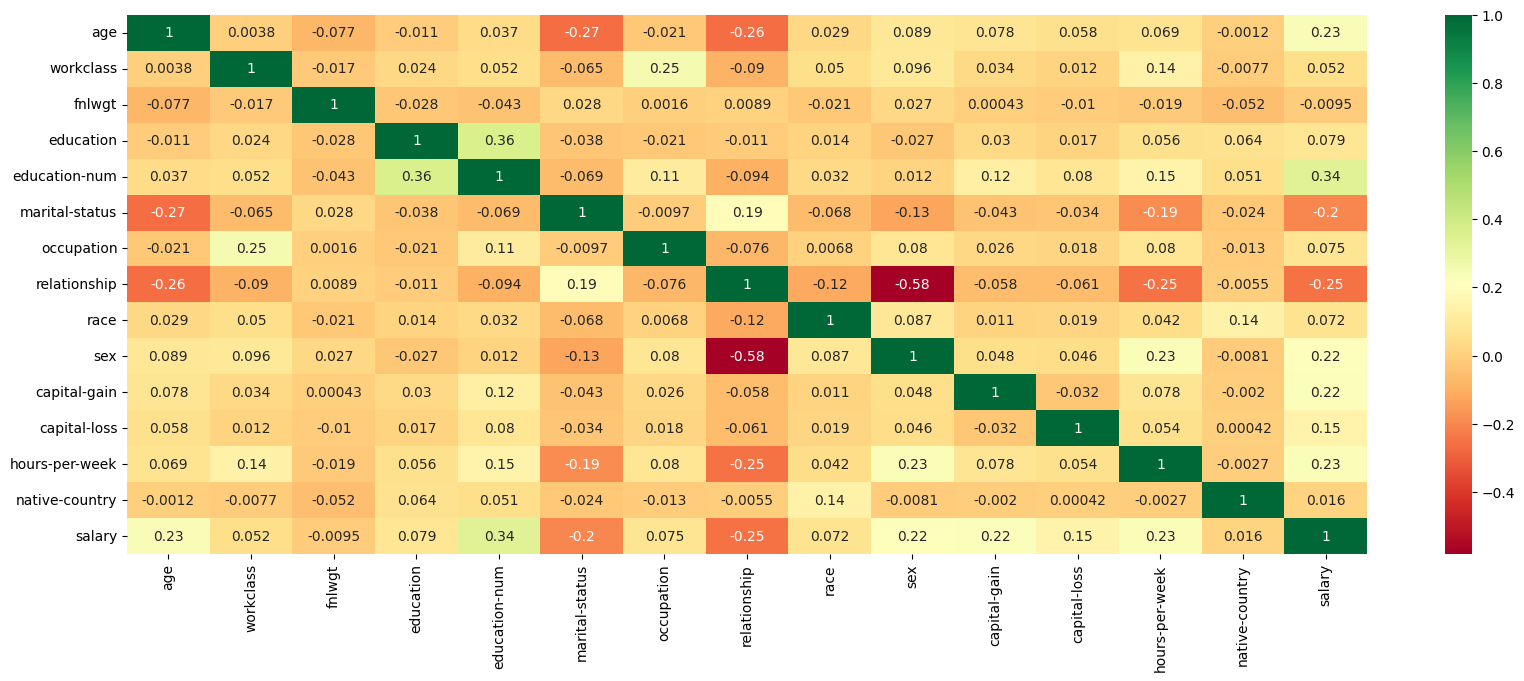

In [12]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

In [13]:
# Example code for calculating correlation coefficients
correlation_matrix = data.corr()
print(correlation_matrix)

                     age  workclass    fnlwgt  education  education-num  \
age             1.000000   0.003787 -0.076646  -0.010508       0.036527   
workclass       0.003787   1.000000 -0.016656   0.023513       0.052085   
fnlwgt         -0.076646  -0.016656  1.000000  -0.028145      -0.043195   
education      -0.010508   0.023513 -0.028145   1.000000       0.359153   
education-num   0.036527   0.052085 -0.043195   0.359153       1.000000   
marital-status -0.266288  -0.064731  0.028153  -0.038407      -0.069304   
occupation     -0.020947   0.254892  0.001597  -0.021260       0.109697   
relationship   -0.263698  -0.090461  0.008931  -0.010876      -0.094153   
race            0.028718   0.049742 -0.021291   0.014131       0.031838   
sex             0.088832   0.095981  0.026858  -0.027356       0.012280   
capital-gain    0.077674   0.033835  0.000432   0.030046       0.122630   
capital-loss    0.057775   0.012216 -0.010252   0.016746       0.079923   
hours-per-week  0.068756 

**Identifing predictor significance**

In [14]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data['salary'], data[['age', 'fnlwgt', 'education-num', 'capital-gain',
       'capital-loss', 'hours-per-week']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 salary   R-squared (uncentered):                   0.354
Model:                            OLS   Adj. R-squared (uncentered):              0.354
Method:                 Least Squares   F-statistic:                              2979.
Date:                Mon, 19 Feb 2024   Prob (F-statistic):                        0.00
Time:                        21:45:32   Log-Likelihood:                         -15898.
No. Observations:               32561   AIC:                                  3.181e+04
Df Residuals:                   32555   BIC:                                  3.186e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
age                0.0021      0.000     14.310      0.000       0.002       0.002
fnlwgt         -3.343e-07   1.93e-08    -17.310      0.000   -3.72e-07   -2.96e-07
education-num      0.0175      0.001     25.149      0.000       0.016       0.019
capital-gain    1.159e-05   2.98e-07     38.952      0.000     1.1e-05    1.22e-05
capital-loss       0.0001   5.45e-06     25.692      0.000       0.000       0.000
hours-per-week     0.0011      0.000      6.707      0.000       0.001       0.001
==============================================================================
Omnibus:                     5079.230   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7687.731
Skew:                           1.181   Prob(JB):                         0.00
Kurtosis:                       2.700   Cond. No.                     7.00e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large,  7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Feature selection using Random Forest Classifier**

In [15]:
# Feature importance using Random Forest
from sklearn.ensemble import RandomForestClassifier

X = data.drop(columns=['salary'])
y = data['salary']
model = RandomForestClassifier()
model.fit(X, y)
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance from Random Forest:")
print(feature_importance)


Feature Importance from Random Forest:
fnlwgt            0.172024
age               0.148523
capital-gain      0.116986
relationship      0.101558
education-num     0.087759
hours-per-week    0.084802
occupation        0.067066
marital-status    0.065470
workclass         0.039012
capital-loss      0.037085
education         0.033868
native-country    0.016878
sex               0.014931
race              0.014036
dtype: float64


In [16]:
# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check if training and test sets have the same data
print("Training Set:")
print(X_train.describe())
print("\nTest Set:")
print(X_test.describe())

Training Set:
                age     workclass        fnlwgt     education  education-num  \
count  26048.000000  26048.000000  2.604800e+04  26048.000000   26048.000000   
mean      38.576513      3.871314  1.897592e+05     10.287853      10.080544   
std       13.642904      1.454505  1.052329e+05      3.871331       2.575202   
min       17.000000      0.000000  1.228500e+04      0.000000       1.000000   
25%       28.000000      4.000000  1.179630e+05      9.000000       9.000000   
50%       37.000000      4.000000  1.782635e+05     11.000000      10.000000   
75%       48.000000      4.000000  2.370065e+05     12.000000      12.000000   
max       90.000000      8.000000  1.484705e+06     15.000000      16.000000   

       marital-status    occupation  relationship          race           sex  \
count    26048.000000  26048.000000  26048.000000  26048.000000  26048.000000   
mean         2.612677      6.573633      1.442030      3.663544      0.668113   
std          1.502321 

**IMPUTATION METHOD**

In [20]:
#Imputation Method using KNN(K Nearest Neighbors)
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder


data = pd.DataFrame(data)

# Encode categorical variables if necessary
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Perform KNN imputation
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(data)

# Convert back to DataFrame
imputed_data = pd.DataFrame(imputed_data, columns=data.columns)

# Decode categorical variables if necessary
for column in imputed_data.select_dtypes(include=['int']).columns:
    if column in label_encoders:
        imputed_data[column] = label_encoders[column].inverse_transform(imputed_data[column].astype(int))

# Now, imputed_df contains your dataset with missing values filled in using KNN imputation


**CALCULATING ACCURACY AND CONFUSION MATRIX**

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Example: Calculate accuracy and confusion matrix for 'workclass'
predicted_values = model.predict(X_test)  # Assuming 'model' is your trained model and X_test is your test data

accuracy = accuracy_score(y_test, predicted_values)  # Assuming 'y_test' is the true labels for the test set
conf_matrix = confusion_matrix(y_test, predicted_values)  # Assuming 'y_test' is the true labels for the test set

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9998464609243052
Confusion Matrix:
[[4942    0]
 [   1 1570]]


In [22]:
df = data[['age', 'fnlwgt', 'education-num', 'capital-gain',
       'capital-loss', 'hours-per-week']].dropna() #subset the dataframe

**VIF(multicollinearity)**

In [23]:
# the independent variables set
X = data[['age', 'fnlwgt', 'education-num', 'capital-gain',
       'capital-loss', 'hours-per-week']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

          feature        VIF
0             age   7.246475
1          fnlwgt   3.683144
2   education-num  10.983289
3    capital-gain   1.032987
4    capital-loss   1.056815
5  hours-per-week   9.758094


**REGULARIZATION**

In [24]:
X = data[['age', 'fnlwgt', 'education-num', 'capital-gain',
       'capital-loss', 'hours-per-week']]

y = data['salary']

#Spliting data into Training 70%, Test set 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [27]:
# Ridge regression with an alpha of 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5)

In [44]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 10.0, 100.0]}

# Instantiate the Ridge regression model
ridge = Ridge(fit_intercept=True)

# Perform GridSearchCV
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print("Best alpha:", best_alpha)

# Fit Ridge regression with the best alpha
best_ridge = Ridge(alpha=best_alpha, fit_intercept=True)
best_ridge.fit(X_train, y_train)


Best alpha: 0.001


Ridge(alpha=0.001)

In [28]:
# rmse after regularization
y_pred = ridge.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

0.36920128969889765

In [29]:
data = h2o.H2OFrame(data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [30]:
data.head()

age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
49,4,160187,6,5,3,8,1,2,0,0,0,16,23,0
52,6,209642,11,9,2,4,0,4,1,0,0,45,39,1
31,4,45781,12,14,4,10,1,4,0,14084,0,50,39,1
42,4,159449,9,13,2,4,0,4,1,5178,0,40,39,1


In [31]:
train, test = data.split_frame(seed = 1234, destination_frames = ["train.hex", "test.hex"])

In [32]:
# check the number of train set and test set
train["is_train"] = 1
test["is_train"] = 0

drift_data = train.rbind(test)
drift_data["is_train"] = drift_data["is_train"].asfactor()

In [33]:
drift_data["is_train"].table()

is_train,Count
0,8068
1,24493


In [40]:
x = list(set(train.col_names) - set(["salary"]))

In [41]:
from h2o.automl import H2OAutoML
# Run AutoML for 10 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=10, seed=1234, sort_metric="MAE", project_name = "random_split")
aml.train(x=x, y="salary", training_frame=train)

AutoML progress: |
21:50:43.555: _train param, Dropping bad and constant columns: [is_train]
21:50:43.556: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
21:51:29.43: _train param, Dropping bad and constant columns: [is_train]
21:51:29.43: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
21:51:32.913: _train param, Dropping bad and constant columns: [is_train]
21:51:32.913: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
21:52:10.499: _train param, Dropping bad and constant columns: [i

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_8_AutoML_2_20240220_12126


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          130755                 10           10           10            100           368           203.4

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.07141939133730019
RMSE: 0.2672440669824125
MAE: 0.16462175974261903
RMSLE: 0.18717361844854374
Mean Residual Deviance: 0.07141939133730019

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.09145127191401538
RMSE: 0.30240911347711624
MAE: 0.188339727804007
RMSLE: 0.2125712449734588
Mean Residual Deviance: 0.09145127191401538

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.188541   0.00207349  0.185249      0.190702      0.189832      0.188395      0.188529
mean_residual_deviance  0.0916063  0.00165292  0.0894796     0.0939107     0.0914945     0.0908381     0.0923084
mse                     0.0916063  0.00165292  0.0894796     0.0939107     0.0914945     0.0908381     0.0923084
r2                      0.499974   0.00759029  0.507778      0.495624      0.501345      0.505841      0.489282
residual_deviance       0.0916063  0.00165292  0.0894796     0.0939107     0.0914945     0.0908381     0.0923084
rmse                    0.302655   0.0027291   0.299131      0.306449      0.302481      0.301394      0.303823
rmsle                   0.212919   0.00200309  0.210389      0.214288      0.214536      0.211101      0.214281

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2024-02-20 01:23:44  16.129 sec  0                  0.428041         0.366437        0.183219
    2024-02-20 01:23:44  16.329 sec  5                  0.354106         0.295199        0.125391
    2024-02-20 01:23:44  16.544 sec  10                 0.318055         0.249661        0.101159
    2024-02-20 01:23:44  16.750 sec  15                 0.30027          0.21992         0.0901618
    2024-02-20 01:23:45  16.947 sec  20                 0.290522         0.201203        0.0844028
    2024-02-20 01:23:45  17.147 sec  25                 0.283831         0.188238        0.08056
    2024-02-20 01:23:45  17.350 sec  30                 0.279924         0.179605        0.0783575
    2024-02-20 01:23:45  17.556 sec  35                 0.275873         0.173697        0.0761057
    2024-02-20 01:23:45  17.746 sec  40                 0.273418         0.169851        0.0747576
    2024-02-20 01:23:46  17.934 sec  45                 0.270168         0.166732        0.0729909
    2024-02-20 01:23:46  18.123 sec  50                 0.267244         0.164622        0.0714194

Variable Importances: 
variable        relative_importance    scaled_importance    percentage
--------------  ---------------------  -------------------  ------------
capital-gain    3126.8                 1                    0.24281
relationship    2570.41                0.822056             0.199603
education-num   1299.77                0.415685             0.100932
marital-status  1217.38                0.389337             0.0945348
age             929.645                0.297315             0.072191
capital-loss    752.356                0.240615             0.0584238
education       673.92

In [36]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head()

model_id,mae,rmse,mse,rmsle,mean_residual_deviance
GBM_4_AutoML_1_20240219_215043,0.18834,0.302409,0.0914513,0.212571,0.0914513
StackedEnsemble_AllModels_1_AutoML_1_20240219_215043,0.189412,0.301126,0.090677,0.211519,0.090677
StackedEnsemble_BestOfFamily_1_AutoML_1_20240219_215043,0.189823,0.301558,0.0909371,0.211918,0.0909371
GBM_3_AutoML_1_20240219_215043,0.191049,0.30246,0.091482,0.212453,0.091482
GBM_2_AutoML_1_20240219_215043,0.192048,0.302111,0.0912712,0.212272,0.0912712
DRF_1_AutoML_1_20240219_215043,0.194019,0.314931,0.0991813,0.22244,0.0991813
GBM_1_AutoML_1_20240219_215043,0.194467,0.305842,0.0935391,0.215103,0.0935391
XGBoost_3_AutoML_1_20240219_215043,0.197605,0.304784,0.0928934,0.214532,0.0928934
XRT_1_AutoML_1_20240219_215043,0.199335,0.312629,0.0977371,0.220084,0.0977371
XGBoost_2_AutoML_1_20240219_215043,0.204794,0.31908,0.101812,0.226545,0.101812


In [42]:
best_model = aml.leader
best_model.model_performance(test)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.09093659844001048
RMSE: 0.3015569572071095
MAE: 0.18710770131698776
RMSLE: 0.21207132534781378
Mean Residual Deviance: 0.09093659844001048

**THE IMPORTANCE OF EACH COLUMN**

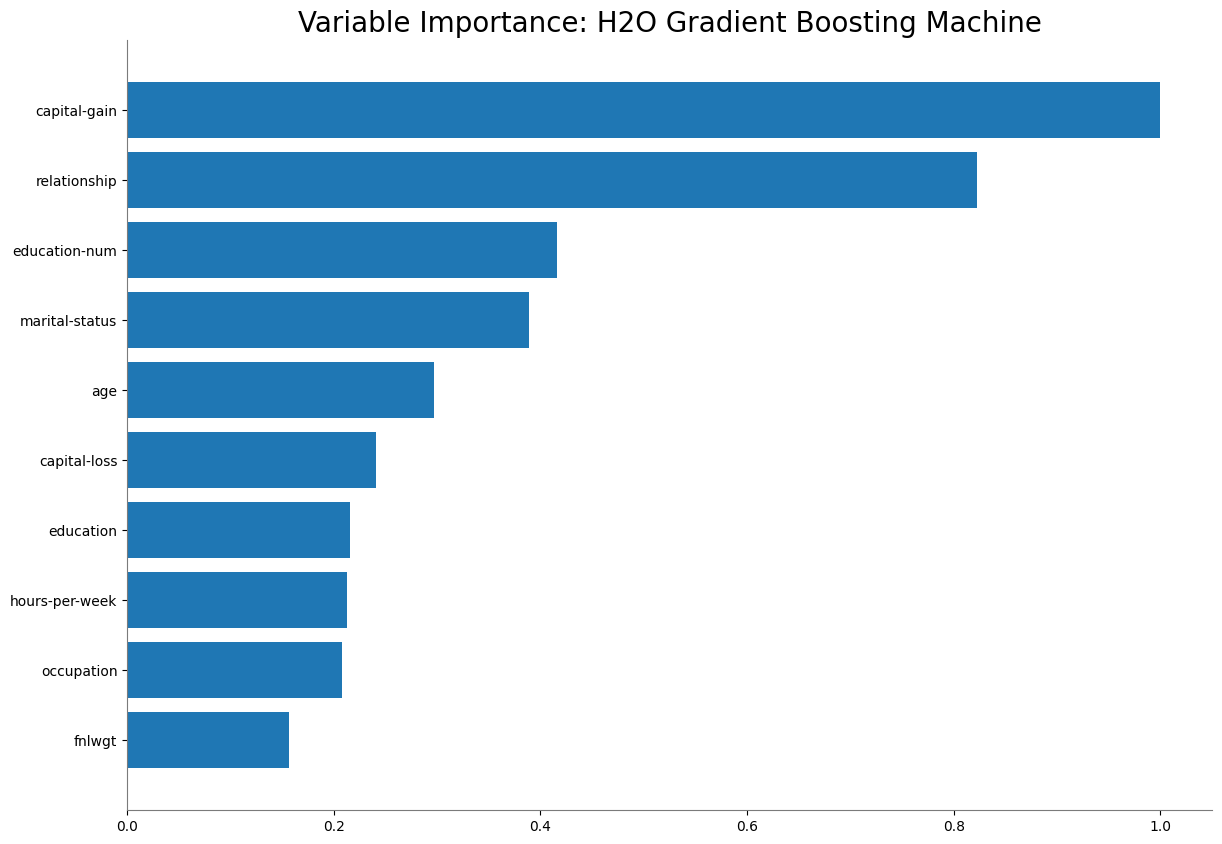

<Figure size 640x480 with 0 Axes>

In [43]:
%matplotlib inline
best_model.varimp_plot()

**ANSWERS FOR QUESTIONS**


1)Is the relationship significant?

-Yes, the relationship between the predictor variables and the target variable (salary) is significant. This is indicated by the low p-values (p < 0.05) associated with each predictor variable in the OLS regression results, suggesting that they have a statistically significant impact on the target variable.

2)Are any model assumptions violated?

-Model assumptions such as linearity, normality of residuals, and homoscedasticity should be assessed. Without the specific outputs related to residuals and diagnostic plots, it's challenging to determine if any assumptions are violated.

3)Is there any multicollinearity in the model?

-Yes, there is multicollinearity present in the model. This is indicated by the high Variance Inflation Factors (VIFs) for "age," "education-num," and "hours-per-week," which exceed the commonly accepted threshold of 5. These values suggest strong correlations among these independent variables, which can impact the model's reliability and interpretation.

4)In the multivariate models are predictor variables independent of all the other predictor variables?

-No, in the multivariate models, the predictor variables are not independent of all the other predictor variables. This can be seen from the heatmap, where there are many non-zero correlations between the predictor variables. For example, there is a strong positive correlation between education and education-num (0.36), and a strong negative correlation between relationship and education (-0.58).

5)Does the model make sense?

-Without detailed analysis and context about the dataset and the problem being solved, it's challenging to definitively say whether the model makes sense. However, the steps you've taken, such as data preprocessing, model training, and evaluation, suggest a systematic approach to building the model.

6)Does regularization help?

-Regularization, specifically Ridge regression with an alpha of 0.5, was applied to address multicollinearity issues. The impact of regularization can be assessed by comparing the performance metrics (e.g., RMSE) of the regularized model to those of a non-regularized model.

7)Which independent variables are significant?

-The significance of independent variables can be determined by examining their coefficients, p-values, or importance scores from the model. For instance, in the AutoML model, you can refer to the variable importance plot (varimp_plot()) to identify significant variables.

8)Which hyperparameters are important?

In Ridge regression, the most important hyperparameter is `alpha`, also known as the regularization strength. It controls the amount of regularization applied to the model. A higher alpha value leads to stronger regularization, which can help prevent overfitting by shrinking the coefficients towards zero. Therefore, in hyperparameter tuning, finding the optimal alpha value is crucial for achieving the best model performance.

9)Coding professionalism?

-yes.



REFERENCES:-

1) ChatGPT

2)https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Smoke_Detection_Example.ipynb

MIT License

Copyright (c) 2024 thoratmansi

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.